In [3]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from sklearn import datasets, linear_model
import scipy.stats as sp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
csvfile = '../clean_data/cleaned_get_it_done_closed_potholes.csv'
df = pd.read_csv(csvfile)

df = df.drop(['address', 'sap_notification_number', 'sap_problem_code', 'service_subtype', 'source', \
            'referred_email_update', 'referral_email', 'functional_location', 'description', \
            'agency_responsible' , 'sap_problem_category', 'case_record_type', 'updated_datetime',\
            'service_request_id', 'parent_case_number'], axis = 1)

In [40]:
#drop all potholes 
#df = df.drop(df[df.sap_problem_type != 'Pothole'].index)

#drop all NaNs for Long and Lat
df = df.dropna(subset = ['long'])
df = df.dropna(subset = ['lat'])

#drop all non-active potholes
df = df.drop(df[df.status_description == 'Duplicate'].index)
df = df.drop(df[df.status_description== 'Closed'].index)
df = df.drop(df[df.status_description=='Closed - Referred'].index)

#Drop all values that are open
df = df.dropna(subset = ['closed_date'])


In [41]:
neighborhoods = np.zeros((len(df['lat']),1))
df['Neighborhood'] = neighborhoods

In [42]:
df.describe()

,Unnamed: 0,duplicate_verified,override_duplicate,open,closed,lat,long,Neighborhood
count,16635.000000,16635.00000,16635.000000,16635.0,16635.0,16635.000000,16635.000000,16635.0
mean,49792.270033,0.44749,0.116201,0.0,1.0,32.795126,-116.998365,0.0
std,22108.382909,0.49725,0.320475,0.0,0.0,1.043610,4.017679,0.0
min,375.000000,0.00000,0.000000,0.0,1.0,-32.784544,-123.068018,0.0
25%,33168.500000,0.00000,0.000000,0.0,1.0,32.748520,-117.201112,0.0
50%,47463.000000,0.00000,0.000000,0.0,1.0,32.794982,-117.151232,0.0
75%,59229.500000,1.00000,0.000000,0.0,1.0,32.841639,-117.096187,0.0
max,100833.000000,1.00000,1.000000,0.0,1.0,52.027394,151.643163,0.0


# Vinh : 0-2400
# Lee Anne: 2400 - 4800
# Maggie: 4800-7200
# Jiggy: 7200 - 9600 
# Tim 9600 - 12000

In [43]:
#get neighborhoods of potholes
import geocoder 

#SET THE X AND Y
x = 14500
y = 16635
neighborhood = []

for i in range (x,y):
    latitutde = df.iloc[[i]]['lat']
    longitude = df.iloc[[i]]['long']
    time.sleep(.1)
    g = geocoder.google([latitutde, longitude], method = 'reverse').json
    if 'neighborhood' not in g:
         df.ix[i, 'Neighborhood'] = 'NaN'
    else:
        neighb = g['neighborhood']
        df.ix[i, 'Neighborhood'] = neighb
    
# for i in range (1401, len(df['long'])):
#     neighborhood.append('ADD ME')
# df['Neighborhood'] = neighborhood

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


# NAME THIS AS '../clean_data/0-2500' 
# or whatever you're range was

In [44]:
df.to_csv('../clean_data/closed14500-16535.csv')

In [15]:
from datetime import datetime
date_format = "%Y-%m-%d %H:%M:%S"

In [16]:
for i in df.index:
    closed_date = str(df['closed_date'][i])
    open_date = str(df['requested_datetime'][i])
    closed_date = closed_date.replace('T',' ')
    open_date = open_date.replace('T',' ')
    df.ix[i, 'closed_date'] = closed_date
    df.ix[i, 'requested_datetime'] = open_date


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,Unnamed: 0,status_description,mobile_web_status,duplicate_verified,override_duplicate,requested_datetime,closed_date,open,closed,service_name,coordinates,lat,long,sap_problem_type
0,375,Closed,Closed,0,0,2017-05-22 22:31:00,2017-05-23 08:41:00,0,1,Pothole,32.751491-117.132034,32.751491,-117.132034,Pothole
1,2225,Closed,Closed,1,0,2017-05-18 09:40:00,2017-05-23 00:03:00,0,1,Pothole,32.9117288178129-117.13295624871824,32.911729,-117.132956,Pothole
2,2795,Closed,Closed,1,0,2017-05-17 10:58:00,2017-05-18 00:02:00,0,1,Pothole,32.89713606866776-117.1233868645065,32.897136,-117.123387,Pothole
3,3603,Closed,Closed,1,0,2017-05-15 18:08:00,2017-05-18 00:02:00,0,1,Pothole,32.7308404-117.16946940000003,32.730840,-117.169469,Pothole
4,4002,Closed,Closed,1,0,2017-05-14 22:16:00,2017-05-23 00:03:00,0,1,Pothole,32.81285686089853-117.2147872519717,32.812857,-117.214787,Pothole
5,4221,Closed,Closed,1,0,2017-05-13 20:36:00,2017-05-17 00:02:00,0,1,Pothole,32.871753570301856-117.23384051246643,32.871754,-117.233841,Pothole
6,4333,Closed,Closed,0,1,2017-05-13 13:49:00,2017-05-18 00:02:00,0,1,Pothole,32.79156512118205-117.254872787853,32.791565,-117.254873,Pothole
7,4695,Closed,Closed,0,0,2017-05-12 13:51:00,2017-05-23 00:03:00,0,1,Pothole,32.74505846600714-117.19936876220703,32.745058,-117.199369,Pothole
8,4883,Closed,Closed,0,1,2017-05-12 07:14:00,2017-05-23 00:03:00,0,1,Pothole,32.80806317928509-117.2108366993416,32.808063,-117.210837,Pothole
9,4886,Closed,Closed,0,1,2017-05-12 07:09:00,2017-05-23 00:03:00,0,1,Pothole,32.808604734049-117.2111466621209,32.808605,-117.211147,Pothole


In [18]:
time_list = []

for i in df.index:
    a = datetime.strptime(str(df['closed_date'][i]), date_format)
    b = datetime.strptime(str(df['requested_datetime'][i]), date_format)
    delta = a - b
    hours_seconds = delta.seconds/3600
    hours_days = delta.days * 24
    time_list.append(hours_days + hours_seconds)
df['Duration to Close (Hrs)'] = time_list

,Unnamed: 0,status_description,mobile_web_status,duplicate_verified,override_duplicate,requested_datetime,closed_date,open,closed,service_name,coordinates,lat,long,sap_problem_type,Duration to Close (Hrs)
0,375,Closed,Closed,0,0,2017-05-22 22:31:00,2017-05-23 08:41:00,0,1,Pothole,32.751491-117.132034,32.751491,-117.132034,Pothole,10.166667
1,2225,Closed,Closed,1,0,2017-05-18 09:40:00,2017-05-23 00:03:00,0,1,Pothole,32.9117288178129-117.13295624871824,32.911729,-117.132956,Pothole,110.383333
2,2795,Closed,Closed,1,0,2017-05-17 10:58:00,2017-05-18 00:02:00,0,1,Pothole,32.89713606866776-117.1233868645065,32.897136,-117.123387,Pothole,13.066667
3,3603,Closed,Closed,1,0,2017-05-15 18:08:00,2017-05-18 00:02:00,0,1,Pothole,32.7308404-117.16946940000003,32.730840,-117.169469,Pothole,53.900000
4,4002,Closed,Closed,1,0,2017-05-14 22:16:00,2017-05-23 00:03:00,0,1,Pothole,32.81285686089853-117.2147872519717,32.812857,-117.214787,Pothole,193.783333
5,4221,Closed,Closed,1,0,2017-05-13 20:36:00,2017-05-17 00:02:00,0,1,Pothole,32.871753570301856-117.23384051246643,32.871754,-117.233841,Pothole,75.433333
6,4333,Closed,Closed,0,1,2017-05-13 13:49:00,2017-05-18 00:02:00,0,1,Pothole,32.79156512118205-117.254872787853,32.791565,-117.254873,Pothole,106.216667
7,4695,Closed,Closed,0,0,2017-05-12 13:51:00,2017-05-23 00:03:00,0,1,Pothole,32.74505846600714-117.19936876220703,32.745058,-117.199369,Pothole,250.200000
8,4883,Closed,Closed,0,1,2017-05-12 07:14:00,2017-05-23 00:03:00,0,1,Pothole,32.80806317928509-117.2108366993416,32.808063,-117.210837,Pothole,256.816667
9,4886,Closed,Closed,0,1,2017-05-12 07:09:00,2017-05-23 00:03:00,0,1,Pothole,32.808604734049-117.2111466621209,32.808605,-117.211147,Pothole,256.900000


In [326]:
a = datetime.strptime(str(df['closed_date'][6125]), date_format)
b = datetime.strptime(str(df['requested_datetime'][6125]), date_format)
delta = a - b
days = delta.minutes
print(a)
print(b)
print(days)

AttributeError: 'datetime.timedelta' object has no attribute 'minutes'

cleaned_open_df = pd.read_csv('../clean_data/final_fixed_open_count_pop.csv', header = None)

In [17]:
cleaned_open_df.to_csv('test.csv')

NameError: name 'cleaned_open_df' is not defined

In [25]:
testdf = pd.read_csv('test.csv', header = None,)
testdf = testdf.drop(0, axis = 1)
testdf = testdf.drop(5, axis = 1)

In [26]:
testdf.columns = ['Neighborhood', 'Pothole_Count', 'Population', 'Population Density']

In [31]:
testdf = testdf.dropna()

TypeError: dropna() got an unexpected keyword argument 'method'

In [45]:
pd.to_numeric(testdf['Population'])
testdf.corr()

,Pothole_Count
Pothole_Count,1.0


In [35]:
for i in testdf.index:
    testdf['Population'][i] = int(testdf['Population'][i])
    testdf['Population Density'][i] = int(testdf['Population Density'][i])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


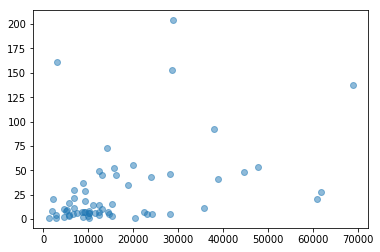

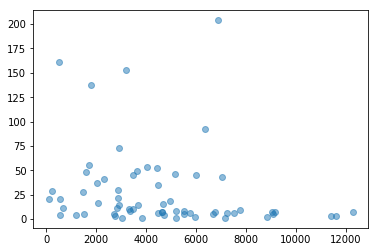

In [14]:
plt.scatter(testdf['Population'], testdf['Pothole_Count'], alpha = 0.5)
plt.show()

plt.scatter(testdf['Population Density'], testdf['Pothole_Count'], alpha = 0.5)
plt.show()

In [15]:
testdf.corr()

,Pothole_Count
Pothole_Count,1.0


In [149]:
y1 = testdf['Pothole_Count']
x1 = testdf['Population']
outcome, predictor = patsy.dmatrices('y1 ~ x1', testdf)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     42.03
Date:                Wed, 31 May 2017   Prob (F-statistic):              0.122
Time:                        00:50:08   Log-Likelihood:                -76.169
No. Observations:                  64   AIC:                             278.3
Df Residuals:                       1   BIC:                             414.3
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.0000      6.364      0.943      

In [29]:
for i in testdf.index:
    testdf['Population'][i] = str(testdf['Population'][i]).replace(',', '')
    testdf['Population Density'][i] = str(testdf['Population Density'][i]).replace(',' , '')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
testdf['Population'].values

array(['28891', '3029', '28561', '68906', '37903', '14101', '20048',
       '47710', '15818', '12392', '44745', '28167', '16097', '13121',
       '24028', '38768', '8839', '18785', '6793', '9186', '61808', '6793',
       '60822', '2209', '9210', '5683', '15197', '11102', '12292', '6885',
       '35713', '4566', '13144', '5344', '5034', '10099', '2029', '9024',
       '8501', '9342', '22415', '12285', '14399', '7452', '11585', '10144',
       '10057', '28224', '14605', '23060', '24176', '6494', '2803', '5804',
       '12283', '9991', '5673', '15358', '8741', '4653', '2878', '1154',
       '10194', '20485'], dtype=object)

In [11]:
testdf

,Neighborhood,Pothole_Count,Population,Population Density
0,Pacific Beach,204,28891,6868
1,Kearny Mesa,161,3029,516
2,La Jolla,153,28561,3205
3,Mira Mesa,138,68906,1793
5,Clairemont,92,37903,6370
7,San Carlos,73,14101,2932
11,Tierrasanta,55,20048,1720
12,University City,53,47710,4050
13,Bay Park,52,15818,4429
14,Bay Ho,49,12392,3625
